## **[:+:] -- Registration & Alignment for Neuroimagery -- [:+:]** 

In [26]:
from pystackreg import StackReg
from skimage import io
from skimage import registration
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import glob
import tifffile as tif
import numpy as np
import scipy.io 
from scipy.io import loadmat
from scipy.ndimage import shift
import os 
import imageio 
import sys
import image_registration as imreg
import seaborn as sb
import pandas as pd
# print(sys.path)
# import cv2
# import sys
# print(sys.path)



mainPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized")
refMat56_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat")
refMat68_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgamma.mat")
refMat97_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNS.mat")
refMouse56_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNSx180_300.tiff")
refMouse68_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgammax180_300.tiff")
refMouse97_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse97_MKNSx180_300.tiff")
unalignedFile180_300_refPrefix= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned180_300_refPrefix.tiff")
unalignedFile180_300_noPrefix= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned180_300_noPrefix.tiff")
unalignedFile68_prefix= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned_ref68_prefix.tiff")
unalignedFile97_prefix= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\unaligned_ref97_prefix.tiff")
matPath = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files') 
samplePath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample")
tiffPath = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_files') 
tiffFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.tiff")
subStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks")
subStackPath1= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\p1")
superStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks")
registeredPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered")


psr_avg56_RB_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m56_RB.tiff")
psr_avg68_RB_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m68_RB.tiff")
psr_avg97_RB_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m97_RB.tiff")
# psr_avgTotalFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avgTotal.tiff")
# psr_movAvg60File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg60.tiff")
# psr_movAvg120File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg120.tiff")
# psr_prevFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_prev.tiff")
# psr_firstFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_firstFrame.tiff")


psr_avg56_AF_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m56_AF.tiff")
psr_avg68_AF_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m68_AF.tiff")
psr_avg97_AF_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m97_AF.tiff")
# psr_avgTotal_AFFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avgTotal_AF.tiff")
# psr_movAvg60_AFFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg60_AF.tiff")
# psr_movAvg120_AFFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg120_AF.tiff")
# psr_prev_AFFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_prev_AF.tiff")
# psr_first_AFFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_firstFrame_AF.tiff")


psr_avg56_SR_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m56_SR.tiff")
psr_avg68_SR_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m68_SR.tiff")
psr_avg97_SR_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m97_SR.tiff")
# psr_avgTotal_SRFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avgTotal_SR.tiff")
# psr_movAvg60_SRFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg60_SR.tiff")
# psr_movAvg120_SRFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg120_SR.tiff")
# psr_prev_SRFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_prev_SR.tiff")
# psr_first_SRFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_firstFrame_SR.tiff")


psr_avg56_BL_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m56_BL.tiff")
psr_avg68_BL_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m68_BL.tiff")
psr_avg97_BL_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avg_m97_BL.tiff")
# psr_avgTotal_BLFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_avgTotal_BL.tiff")
# psr_movAvg60_BLFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg60_BL.tiff")
# psr_movAvg120_BLFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_movAvg120_BL.tiff")
# psr_first_BLFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\psr_firstFrame_BL.tiff")

dft_avg56_File= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\dft_avgTensor.tiff")



#[::]-- Rigid Body----------------------------------------------------------------------------//
unaligned180_300= io.imread(unalignedFile180_300_refPrefix)[:, :, 120:]
std_Unaligned= np.std(unaligned180_300, axis= 2)
vLen= unaligned180_300.shape[2]

refMean56 = np.mean(io.imread(refMouse56_File), axis=2)
refMean68 = np.mean(io.imread(refMouse68_File), axis=2)
refMean97 = np.mean(io.imread(refMouse97_File), axis=2)


psr_avg56_RB= io.imread(psr_avg56_RB_File)
# psr_avgTotal= io.imread(psr_avgTotalFile)
# psr_movAvg60= io.imread(psr_movAvg60File)
# psr_movAvg120= io.imread(psr_movAvg120File)[:, :, 120:]
# psr_prev= io.imread(psr_prevFile)
# psr_firstFrame= io.imread(psr_firstFile)

std_psr_avg56_RB= np.std(psr_avg56_RB, axis= 2)
# std_psr_avgTotal= np.std(psr_avgTotal, axis= 2)
# std_psr_movAvg60= np.std(psr_movAvg60, axis= 2)
# std_psr_movAvg120= np.std(psr_movAvg120, axis= 2)
# std_psr_prev= np.std(psr_prev, axis= 2)
# std_psr_firstFrame= np.std(psr_firstFrame, axis= 2)

#[::]-- Affine----------------------------------------------------------------------------//
psr_avg56_AF= io.imread(psr_avg56_AF_File)
# psr_avgTotal_AF= io.imread(psr_avgTotal_AFFile)
# psr_movAvg60_AF= io.imread(psr_movAvg60_AFFile)
# psr_movAvg120_AF= io.imread(psr_movAvg120_AFFile)
# psr_prev_AF= io.imread(psr_prev_AFFile)
# psr_firstFrame_AF= io.imread(psr_first_AFFile)

std_psr_avg56_AF= np.std(psr_avg56_AF, axis= 2)
# std_psr_avgTotal_AF= np.std(psr_avgTotal_AF, axis= 2)
# std_psr_movAvg60_AF= np.std(psr_movAvg60_AF, axis= 2)
# std_psr_movAvg120_AF= np.std(psr_movAvg120_AF, axis= 2)
# std_psr_prev_AF= np.std(psr_prev_AF, axis= 2)
# std_psr_firstFrame_AF= np.std(psr_firstFrame_AF, axis= 2)

#[::]-- Scale + Rotation----------------------------------------------------------------------------//
psr_avg56_SR= io.imread(psr_avg56_SR_File)
# psr_avgTotal_SR= io.imread(psr_avgTotal_SRFile)
# psr_movAvg60_SR= io.imread(psr_movAvg60_SRFile)
# psr_movAvg120_SR= io.imread(psr_movAvg120_SRFile)
# psr_prev_SR= io.imread(psr_prev_SRFile)
# psr_firstFrame_SR= io.imread(psr_first_SRFile)

std_psr_avg56_SR= np.std(psr_avg56_SR, axis= 2)
# std_psr_avgTotal_SR= np.std(psr_avgTotal_SR, axis= 2)
# std_psr_movAvg60_SR= np.std(psr_movAvg60_SR, axis= 2)
# std_psr_movAvg120_SR= np.std(psr_movAvg120_SR, axis= 2)
# std_psr_prev_SR= np.std(psr_prev_SR, axis= 2)
# std_psr_firstFrame_SR= np.std(psr_firstFrame_SR, axis= 2)

#[::]-- Bilinear----------------------------------------------------------------------------//
psr_avg56_BL= io.imread(psr_avg56_BL_File)
# psr_avgTotal_BL= io.imread(psr_avgTotal_BLFile)
# psr_movAvg60_BL= io.imread(psr_movAvg60_BLFile)
# psr_movAvg120_BL= io.imread(psr_movAvg120_BLFile)
# psr_prev_BL= np.zeros((128,91,9840))
# psr_firstFrame_BL= io.imread(psr_first_BLFile)

std_psr_avg56_BL= np.std(psr_avg56_BL, axis= 2)
# std_psr_avgTotal_BL= np.std(psr_avgTotal_BL, axis= 2)
# std_psr_movAvg60_BL= np.std(psr_movAvg60_BL, axis= 2)
# std_psr_movAvg120_BL= np.std(psr_movAvg120_BL, axis= 2)
# std_psr_prev_BL= np.std(psr_prev_BL, axis= 2)
# std_psr_firstFrame_BL= np.std(psr_firstFrame_BL, axis= 2)


psr_avg56_RB= io.imread(psr_avg56_RB_File)
std_psr_avg56= np.std(psr_avg56_RB, axis= 2)
psr_avg56_AF= io.imread(psr_avg56_AF_File)
std_psr_avg56_AF= np.std(psr_avg56_AF, axis= 2)
psr_avg56_SR= io.imread(psr_avg56_SR_File)
std_psr_avg56_SR= np.std(psr_avg56_SR, axis= 2)
psr_avg56_BL= io.imread(psr_avg56_BL_File)
std_psr_avg56_BL= np.std(psr_avg56_BL, axis= 2)

psr_avg68_RB= io.imread(psr_avg68_RB_File)
std_psr_avg68= np.std(psr_avg68_RB, axis= 2)
psr_avg68_AF= io.imread(psr_avg68_AF_File)
std_psr_avg68_AF= np.std(psr_avg68_AF, axis= 2)
psr_avg68_SR= io.imread(psr_avg68_SR_File)
std_psr_avg68_SR= np.std(psr_avg68_SR, axis= 2)
psr_avg68_BL= io.imread(psr_avg68_BL_File)
std_psr_avg68_BL= np.std(psr_avg68_BL, axis= 2)

psr_avg97_RB= io.imread(psr_avg97_RB_File)
std_psr_avg97= np.std(psr_avg97_RB, axis= 2)
psr_avg97_AF= io.imread(psr_avg97_AF_File)
std_psr_avg97_AF= np.std(psr_avg97_AF, axis= 2)
psr_avg97_SR= io.imread(psr_avg97_SR_File)
std_psr_avg97_SR= np.std(psr_avg97_SR, axis= 2)
psr_avg97_BL= io.imread(psr_avg97_BL_File)
std_psr_avg97_BL= np.std(psr_avg97_BL, axis= 2)

#[::]-- DFT ----------------------------------------------------------------------------//
dft_reg= io.imread(dft_avg56_File)
std_dft_reg= np.std(dft_reg, axis=2 )


## __[+]__ Functions

In [2]:
def tensorize(filename, beginDex=0):
    print(filename)
    if os.path.isfile(filename):
        baseName = os.path.basename(filename)
        if baseName.endswith('.mat'): 
            print("\n[::] --- Fields of the MAT file: --- " + str(filename))
            filename= loadmat(filename)
            vTensor = filename['MouseData']
            print(filename.keys())
            print("Header: " + str(filename['__header__']))
            print("Version: " + str(filename['__version__']))
            print("Globals: " + str(filename['__globals__']))
            print("[::] --- Type and dimensions of MAT img data: ")
            print(type(vTensor))
            print((vTensor.shape))
            print("Elements of type: " + str(type(vTensor[0][0][0])))
            print((vTensor[0][0][0+beginDex]))
            print((vTensor[1][1][1+beginDex]))
            print((vTensor[2][2][2+beginDex]))
        elif baseName.endswith('.tiff'):
            print("\n[::] --- Type and dimensions of TIFF File: --- " + str(filename))
            filename= io.imread(filename)
            print(type(filename))
            shape= filename.shape
            print("Shape: " + str(shape))
            if len(shape)==3 :
                print("Elements of type: " + str(type(filename[0][0][0])))
                print((filename[0][0][0]))
                print((filename[1][1][1]))
                print((filename[2][2][2]))
            else: 
                print("Elements of type: " + str(type(filename[0][0])))
                print((filename[0][0]))
                print((filename[1][1]))
                print((filename[2][2]))
        else: print("\nInvalid File type, no tensorInfo")
    elif isinstance(filename, np.ndarray):
        print("\n[::] --- Type and dimensions of Tensor: --- " )
        shape= filename.shape
        print("Shape: " + str(shape))
        if len(shape)==3 :
            print("Elements of type: " + str(type(filename[0][0][0])))
            print((filename[0][0][0]))
            print((filename[1][1][1]))
            print((filename[2][2][2]))
        else: 
            print("Elements of type: " + str(type(filename[0][0])))
            print((filename[0][0]))
            print((filename[1][1]))
            print((filename[2][2]))
    else: print("\nNo tensorInfo, Invalid Input")



def mattotiff(matFile, outPath, beginDex=0, enDex=3600, showTensorInfo=False, addendum=""):
    matData= loadmat(matFile)
    vTensor = matData['MouseData']
    vTensor= vTensor[:, :, beginDex:enDex]

    # [+]- Save 3d tensor as a tiff image stack, saves into current directory by default
    matBaseName = os.path.basename(matFile)
    tiffName = os.path.splitext(matBaseName)[0] + addendum+".tiff"
    output_filename = os.path.join(outPath, tiffName)
    tif.imsave(output_filename, vTensor, bigtiff=True)

    #[+]- Access the new  TIFF file, and makes sure its dimensions are proper
    if showTensorInfo:
        print("matFile: " + matFile)
        print("matBaseName: " + matBaseName)
        print("tiffName: " + tiffName)
        print("output_filename: " + output_filename)
        tensorize(matFile, beginDex)
    return output_filename


def euclidistance(a, b):
    # Make sure a and b have the same shape
    assert a.shape == b.shape
    # Calculate the difference between the two arrays element-wise
    diff = a - b
    # [+] Euclidean distance = frobenius norm of the sum of squared differences
    distance = np.linalg.norm(diff)
    return distance

def slice_n_Dice(mat1, mat2):
    assert mat2.shape == mat1.shape
    intersection = np.sum(mat1 * mat2)
    union = np.sum(mat1) + np.sum(mat2)
    dice = (2 * intersection) / union
    return dice

def distanceMatrix(vTensor, fMatrix,  endex, begindex=0):
    eDists= np.empty(0)
    diceSims= np.empty(0)
    for i in range(begindex, endex):
        eDist= euclidistance((vTensor[:, :, i]), fMatrix)
        eDists= np.append(eDists, eDist)

        diceSim= slice_n_Dice((vTensor[:, :, i]), fMatrix)
        diceSims= np.append(diceSims, diceSim)
    return eDists, diceSims

def DFTreg(vTensor, fMatrix,  endex, begindex=0):
    dft_avgTensor =np.reshape(fMatrix, (fMatrix.shape[0], fMatrix.shape[1], 1))
    offsets= np.empty(0)
    for i in range(begindex, endex):
        imReg= imreg.register_images(fMatrix, (vTensor[:, :, i]), return_registered=True )
        alignedMat= np.reshape(imReg[2], (imReg[2].shape[0], imReg[2].shape[1], 1))
        dft_avgTensor= np.concatenate((dft_avgTensor, alignedMat), axis=2)
        offDist= np.sqrt( imReg[0]**2 + imReg[1]**2)
        offsets= np.append(offsets, offDist )
    return dft_avgTensor, offsets


## __[+]__ Distance Matrix

In [3]:
#[:]-- Create the distance matrices
unaligned_DM= (distanceMatrix(unaligned180_300, refMean56, endex=vLen, begindex= 0))
psr_ref56_DM= (distanceMatrix(psr_avg56_RB, refMean56, endex=vLen, begindex= 0))
# psr_avgTotal_DM= (distanceMatrix(psr_avgTotal, refMean56, endex=vLen, begindex= 0))
# psr_movAvg60_DM= (distanceMatrix(psr_movAvg60, refMean56, endex=vLen, begindex= 0))
# psr_movAvg120_DM= (distanceMatrix(psr_movAvg120, refMean56, endex=vLen, begindex= 0))
# psr_prev_DM= (distanceMatrix(psr_prev, refMean56, endex=vLen, begindex= 0))
# psr_first_DM= (distanceMatrix(psr_firstFrame, refMean56, endex=vLen, begindex= 0))

psr_ref56_AF_DM= (distanceMatrix(psr_avg56_AF, refMean56, endex=vLen, begindex= 0))
# psr_avgTotal_AF_DM= (distanceMatrix(psr_avgTotal_AF, refMean56, endex=vLen, begindex= 0))
# psr_movAvg60_AF_DM= (distanceMatrix(psr_movAvg60_AF, refMean56, endex=vLen, begindex= 0))
# psr_movAvg120_AF_DM= (distanceMatrix(psr_movAvg120_AF, refMean56, endex=vLen, begindex= 0))
# psr_prev_AF_DM= (distanceMatrix(psr_prev_AF, refMean56, endex=vLen, begindex= 0))
# psr_first_AF_DM= (distanceMatrix(psr_firstFrame_AF, refMean56, endex=vLen, begindex= 0))

psr_ref56_SR_DM= (distanceMatrix(psr_avg56_SR, refMean56, endex=vLen, begindex= 0))
# psr_avgTotal_SR_DM= (distanceMatrix(psr_avgTotal_SR, refMean56, endex=vLen, begindex= 0))
# psr_movAvg60_SR_DM= (distanceMatrix(psr_movAvg60_SR, refMean56, endex=vLen, begindex= 0))
# psr_movAvg120_SR_DM= (distanceMatrix(psr_movAvg120_SR, refMean56, endex=vLen, begindex= 0))
# psr_prev_SR_DM= (distanceMatrix(psr_prev_SR, refMean56, endex=vLen, begindex= 0))
# psr_first_SR_DM= (distanceMatrix(psr_firstFrame_SR, refMean56, endex=vLen, begindex= 0))

psr_ref56_BL_DM= (distanceMatrix(psr_avg56_BL, refMean56, endex=vLen, begindex= 0))
# psr_avgTotal_BL_DM= (distanceMatrix(psr_avgTotal_BL, refMean56, endex=vLen, begindex= 0))
# psr_movAvg60_BL_DM= (distanceMatrix(psr_movAvg60_BL, refMean56, endex=vLen, begindex= 0))
# psr_movAvg120_BL_DM= (distanceMatrix(psr_movAvg120_BL, refMean56, endex=vLen, begindex= 0))
# psr_prev_BL_DM= (distanceMatrix(psr_movAvg120_BL, refMean56, endex=vLen, begindex= 0))
# psr_first_BL_DM= (distanceMatrix(psr_firstFrame_BL, refMean56, endex=vLen, begindex= 0))

psr_ref68_RB_DM= (distanceMatrix(psr_avg68_RB, refMean68, endex=vLen, begindex= 0))
psr_ref68_AF_DM= (distanceMatrix(psr_avg68_AF, refMean68, endex=vLen, begindex= 0))
psr_ref68_SR_DM= (distanceMatrix(psr_avg68_SR, refMean68, endex=vLen, begindex= 0))
psr_ref68_BL_DM= (distanceMatrix(psr_avg68_BL, refMean68, endex=vLen, begindex= 0))

psr_ref97_RB_DM= (distanceMatrix(psr_avg97_RB, refMean97, endex=vLen, begindex= 0))
psr_ref97_AF_DM= (distanceMatrix(psr_avg97_AF, refMean97, endex=vLen, begindex= 0))
psr_ref97_SR_DM= (distanceMatrix(psr_avg97_SR, refMean97, endex=vLen, begindex= 0))
psr_ref97_BL_DM= (distanceMatrix(psr_avg97_BL, refMean97, endex=vLen, begindex= 0))

dft_reg_DM= (distanceMatrix(dft_reg, refMean56, endex=vLen, begindex= 0))

In [25]:
psr_ref68_RB_DM= (distanceMatrix(psr_avg68_RB, refMean68, endex=vLen, begindex= 0))
psr_ref68_AF_DM= (distanceMatrix(psr_avg68_AF, refMean68, endex=vLen, begindex= 0))
psr_ref68_SR_DM= (distanceMatrix(psr_avg68_SR, refMean68, endex=vLen, begindex= 0))
psr_ref68_BL_DM= (distanceMatrix(psr_avg68_BL, refMean68, endex=vLen, begindex= 0))

psr_ref97_RB_DM= (distanceMatrix(psr_avg97_RB, refMean97, endex=vLen, begindex= 0))
psr_ref97_AF_DM= (distanceMatrix(psr_avg97_AF, refMean97, endex=vLen, begindex= 0))
psr_ref97_SR_DM= (distanceMatrix(psr_avg97_SR, refMean97, endex=vLen, begindex= 0))
psr_ref97_BL_DM= (distanceMatrix(psr_avg97_BL, refMean97, endex=vLen, begindex= 0))

## __[+]:.__ Process .MAT Reference Files

In [14]:
# [+]- Find the reference MAT file, convert it into a TIFF img stack, then extract the substack
refTiff56_base= mattotiff(matFile= refMat56_File, outPath= samplePath, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
refTiff68_base= mattotiff(matFile= refMat68_File, outPath= samplePath, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")
refTiff97_base= mattotiff(matFile= refMat97_File, outPath= samplePath, beginDex=180, enDex=300, showTensorInfo= True, addendum= "x180_300")




matFile: C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgamma.mat
matBaseName: Norm_Mouse68_MKgamma.mat
tiffName: Norm_Mouse68_MKgammax180_300.tiff
output_filename: C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgammax180_300.tiff
C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgamma.mat

[::] --- Fields of the MAT file: --- C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse68_MKgamma.mat
dict_keys(['__header__', '__version__', '__globals__', 'MouseData'])
Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb  9 21:00:34 2023'
Version: 1.0
Globals: []
[::] --- Type and dimensions of MAT img data: 
<class 'numpy.ndarray'>
(128, 91, 3600)
Elements of type: <class 'numpy.float64'>
0.009367501390631238
0.026892622910335225
0.02

## **[+]** Convert Entire Directory .MAT ->.TIFF 

In [18]:
# Get a list of all files in the directory
matFiles = [f for f in os.listdir(matPath) if os.path.isfile(os.path.join(matPath, f))]
# Print the number of files
print(f"Number of files in directory '{matPath}': {len(matFiles)}") 

# [+]- Iterate through directory of MAT files, converting each one into TIFF files:
for filename in matFiles:
    if filename.endswith('.mat'): 
        # print(filename)
        mattotiff(os.path.join(matPath, filename), outPath=tiffPath, beginDex=180, enDex=300, showTensorInfo= False, addendum= "x180_300")

Number of files in directory 'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files': 82


#### __[+]__ Confirm Conversion

In [ ]:
tiffFiles = [file for file in os.listdir(tiffPath) if os.path.isfile(os.path.join(tiffPath, file))]
print(f"Number of files in matPath directory '{matPath}': {len(matFiles)}")
print(f"Number of files in tiffPath directory '{tiffPath}': {len(tiffFiles)}")
for i in np.array([1,2,3,5,7,9]):
    print("\n[:::] ====================================================================================================================[::]")
    tensorize(os.path.join(matPath, matFiles[i]), beginDex= 180)
    tensorize(os.path.join(tiffPath, tiffFiles[i]), beginDex= 0)

## __[+]__ Tensor Stack Compilation

In [ ]:
#[:+]- Compile the Tensor to be aligned -----[:]--- Put the reference substack in the right folder-----------------------------------------------//
tensorFrames= io.imread(refMouse56_File)

#[:]--- Start with the reference frames, and append a directory of TIFF files onto it
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))

#[:+]- Save the resulting unregistered tensor, will need later ----------------------------//
unalignedFile180_300= os.path.join(superStackPath,"unaligned180_300_refPrefix.tiff")
tif.imsave(unalignedFile180_300, tensorFrames)

#[+]- Save a version WITHOUT the reference appended at the beginning, for different registration methods
unalignedFile180_300= os.path.join(superStackPath,"unaligned180_300_noPrefix.tiff")
tif.imsave(unalignedFile180_300, tensorFrames[:, :, 120:])

unprefixed= io.imread(unalignedFile180_300_noPrefix)
prefixed= io.imread(unalignedFile180_300_refPrefix)

#[:+]- -----------Sanity Check ----------------------------------------------------//
#[:]- These should be equivalent:
tensorize(refMouse56_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

#[:]- These should be equivalent:
tensorize(prefixed[:, :, 120:], beginDex= 0)
tensorize(unprefixed, beginDex=0)

In [ ]:
tensorFrames= io.imread(refMouse68_File)
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))
outPath= os.path.join(superStackPath,"unaligned_ref68_prefix.tiff")
tif.imsave(outPath, tensorFrames)
prefixed= io.imread(outPath)

#[+:]-- check equivalancy --
tensorize(refMouse68_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

In [5]:
tensorFrames= io.imread(refMouse97_File)
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))
outPath= os.path.join(superStackPath,"unaligned_ref97_prefix.tiff")
tif.imsave(outPath, tensorFrames)
prefixed= io.imread(outPath)

#[+:]-- check equivalancy --
tensorize(refMouse97_File, beginDex= 0)
tensorize(prefixed[:, :, 0:120], beginDex= 0)

Norm_Mouse100_MKNSx180_300.tiff ---> (128, 91, 240)
Norm_Mouse102_Sthetax180_300.tiff ---> (128, 91, 360)
Norm_Mouse104_MKthetax180_300.tiff ---> (128, 91, 480)
Norm_Mouse105_Sthetax180_300.tiff ---> (128, 91, 600)
Norm_Mouse106_SNSx180_300.tiff ---> (128, 91, 720)
Norm_Mouse107_MKthetax180_300.tiff ---> (128, 91, 840)
Norm_Mouse108_Sthetax180_300.tiff ---> (128, 91, 960)
Norm_Mouse109_MKgammax180_300.tiff ---> (128, 91, 1080)
Norm_Mouse110_Sgammax180_300.tiff ---> (128, 91, 1200)
Norm_Mouse111_Sthetax180_300.tiff ---> (128, 91, 1320)
Norm_Mouse112_Sthetax180_300.tiff ---> (128, 91, 1440)
Norm_Mouse113_Sgammax180_300.tiff ---> (128, 91, 1560)
Norm_Mouse114_SNSx180_300.tiff ---> (128, 91, 1680)
Norm_Mouse115_SNSx180_300.tiff ---> (128, 91, 1800)
Norm_Mouse116_Sgammax180_300.tiff ---> (128, 91, 1920)
Norm_Mouse117_Sthetax180_300.tiff ---> (128, 91, 2040)
Norm_Mouse118_MKgammax180_300.tiff ---> (128, 91, 2160)
Norm_Mouse119_SNSx180_300.tiff ---> (128, 91, 2280)
Norm_Mouse120_Sthetax180_30

## __[+:]__ Referencing Methods

#### __[+]__ Initialize for Registration

In [15]:
registrarRB = StackReg(StackReg.RIGID_BODY)
registrarSR = StackReg(StackReg.SCALED_ROTATION)
registrarAF = StackReg(StackReg.AFFINE)
registrarBL = StackReg(StackReg.BILINEAR)

#Mouse 56 ref: 
unaligned180_300_refPrefix= io.imread(unalignedFile180_300_refPrefix)
unaligned180_300_noPrefix= io.imread(unalignedFile180_300_refPrefix)[:, :, 120:]
# unaligned180_300_noPrefix= io.imread(unalignedFile180_300_noPrefix)

# mice 68 & 97 ref
unaligned68_prefix= io.imread(unalignedFile68_prefix)
unaligned68_noPrefix= unaligned68_prefix[:, :, 120:]
unaligned97_prefix= io.imread(unalignedFile97_prefix)
unaligned97_noPrefix= unaligned97_prefix[:, :, 120:]

#### __[+]__ Rigid Body Registration:  to Previous Frame

In [4]:
#[:+:]--- -----------------------------------Choose Referencing Method  ------------------------------------------------------------------------------//
#[ ]-  this option registers each frame to the previous (already registered) one
psr_prev = registrarRB.register_transform_stack(unaligned180_300_noPrefix, reference='previous')
outPath= os.path.join(registeredPath,"psr_prev.tiff")
tif.imsave(outPath, psr_prev)
psr_prev= io.imread(outPath)
tensorize(psr_prev)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.051203228533267975
0.08659610152244568
0.07894855737686157


#### __[+]__ Rigid Body Registration: to First Image

In [19]:
#[ ]-  this option registers to first image:
psr_firstFrame = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first')[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_firstFrame.tiff")
tif.imsave(outPath, psr_firstFrame)
psr_firstFrame= io.imread(outPath)
tensorize(psr_firstFrame)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.051203228533267975
0.08556574583053589
0.08372913300991058


#### __[+]__ Rigid Body Registration: the Total Mean

In [47]:
#[ ]-  this option registers to mean image:
psr_mean = registrarRB.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
outPath= os.path.join(registeredPath,"psr_avgTotal.tiff")
tif.imsave(outPath, psr_mean)
psr_avgTotal= io.imread(outPath)
tensorize(psr_avgTotal)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9840)
Elements of type: <class 'numpy.float64'>
0.04614986479282379
0.06338934600353241
0.06866535544395447


#### __[+]__ Rigid Body Registration: Mean of First n images

In [23]:
# [+]-  this option registers to mean of first n_frames(300-180=120) images:
psr_avg_m56_RB = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# [:+:]---  Saving the results  -----[-]- To save the output to a tiff stack image, first convert float values to int  **[+]- Actually doesn't seem necessary, float64 works
# psr_avg180_300 = psr_avg180_300.astype(np.int8)

outPath= os.path.join(registeredPath,"psr_avg_m56_RB.tiff")
tif.imsave(outPath, psr_avg_m56_RB)
rez= io.imread(outPath)
tensorize(rez)


# # [+]-- Mouse 68 :
# psr_avg_m68_RB= registrarRB.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_avg_m68_RB.tiff")
# tif.imsave(outPath, psr_avg_m68_RB)
# psr_avg_m68_RB = io.imread(outPath)
# tensorize(psr_avg_m68_RB)

# #[+]-- Mouse 97 :
# psr_avg_m97_RB= registrarRB.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_avg_m97_RB.tiff")
# tif.imsave(outPath, psr_avg_m97_RB)
# psr_avg_m97_RB = io.imread(outPath)
# tensorize(psr_avg_m97_RB)

[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200469 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.03592061 0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.0774544  0.07683522 0.07611986 ... 0.09800976 0.09717383 0.09648332]
  [0.06134504 0.06161446 0.06180528 ... 0.10755752 0.10755584 0.10717402]
  [0.05618766 0.05608213 0.05614242 ... 0.10071981 0.10082572 0.100826  ]
  ...
  [0.04746076 0.0476366  0.04833948 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.06961325 0.06917895 0.06870589 ... 0.10543156 0.10586195 0.10638005]
  [0.05916556 0.059628

#### __[+]__ Rigid Body Registration: Moving Average

In [43]:
# calculate a moving average of n_frames images, then register the moving average to the mean of the first x images and transform the original image (not the moving average)
# windowSize= 60
# psr_movAvg60 = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)
# outPath= os.path.join(registeredPath,"psr_movAvg60.tiff")
# tif.imsave(outPath, psr_movAvg60)
# rez= io.imread(outPath)
# tensorize(rez)

windowSize= 120
psr_movAvg120 = registrarRB.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)
outPath= os.path.join(registeredPath,"psr_movAvg120.tiff")
tif.imsave(outPath, psr_movAvg120)
psr_movAvg120= io.imread(outPath)
tensorize(psr_movAvg120)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9960)
Elements of type: <class 'numpy.float64'>
0.06249745935201645
0.08422132581472397
0.08067630976438522


#### __[ ]__ DFT Registration  + Chi2Shift Error

In [5]:
dft_mean= DFTreg(unaligned180_300_noPrefix, refMean56,  endex=vLen, begindex= 0)
dft_avgTensor= dft_mean[0]
dft_chiSq= dft_mean[1]
outPath= os.path.join(registeredPath,"dft_avgTensor.tiff")
tif.imsave(outPath, dft_avgTensor)
dft_avgTensor= io.imread(outPath)
tensorize(dft_avgTensor)


[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9841)
Elements of type: <class 'numpy.float64'>
0.062392737493604335
0.011568556737670037
0.018137672564995367


#### __[+]__ Affine Registration

In [17]:
# [+:]-- Mouse 56 ref
psr_avg_m56_AF = registrarAF.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m56_AF.tiff")
tif.imsave(outPath, psr_avg_m56_AF)
psr_avg_AF= io.imread(outPath)
tensorize(psr_avg_m56_AF)

# [+:]-- Mouse 68 ref
psr_avg_m68_AF = registrarAF.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m68_AF.tiff")
tif.imsave(outPath, psr_avg_m68_AF)
psr_avg_m68_AF= io.imread(outPath)
tensorize(psr_avg_m68_AF)

# [+:]-- Mouse 97 ref
psr_avg_m97_AF = registrarAF.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m97_AF.tiff")
tif.imsave(outPath, psr_avg_m97_AF)
psr_avg_m97_AF= io.imread(outPath)
tensorize(psr_avg_m97_AF)

# #[+]-   Moving window affine
# windowSize= 60
# psr_movAvg60_AF = registrarAF.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_movAvg60_AF.tiff")
# tif.imsave(outPath, psr_movAvg60_AF)
# rez= io.imread(outPath)
# tensorize(rez)


# windowSize= 120
# psr_movAvg60_AF = registrarAF.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_movAvg120_AF.tiff")
# tif.imsave(outPath, psr_movAvg60_AF)
# rez= io.imread(outPath)
# tensorize(rez)

# #[+]-  this option registers to mean image:
# psr_mean_AF = registrarAF.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
# outPath= os.path.join(registeredPath,"psr_avgTotal_AF.tiff")
# tif.imsave(outPath, psr_mean_AF)
# psr_avgTotal_AF= io.imread(outPath)
# tensorize(psr_avgTotal_AF)

# #[+]-  this option registers each frame to the previous (already registered) one
# psr_prev_AF = registrarAF.register_transform_stack(unaligned180_300_noPrefix, reference='previous')
# outPath= os.path.join(registeredPath,"psr_prev_AF.tiff")
# tif.imsave(outPath, psr_prev_AF)
# psr_prev_AF= io.imread(outPath)
# tensorize(psr_prev_AF)

# psr_firstFrame_AF = registrarAF.register_transform_stack(unaligned180_300_refPrefix, reference='first')[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_firstFrame_AF.tiff")
# tif.imsave(outPath, psr_firstFrame_AF)
# psr_firstFrame_AF= io.imread(outPath)
# tensorize(psr_firstFrame_AF)

[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200469 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.03592061 0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.07628182 0.07578138 0.07517672 ... 0.09715632 0.09606572 0.09523181]
  [0.05968923 0.0597799  0.06008711 ... 0.10695517 0.10701325 0.10679241]
  [0.05688934 0.05653324 0.0566123  ... 0.10314321 0.10302549 0.10272203]
  ...
  [0.03622828 0.03304742 0.034557   ... 0.0742057  0.07353696 0.07256677]
  [0.04500275 0.04260241 0.04323648 ... 0.07455128 0.07340839 0.0721646 ]
  [0.04225057 0.03895172 0.03931436 ... 0.07215638 0.07235909 0.07267322]]

 [[0.06095967 0.06075804 0.06064451 ... 0.10539572 0.10585724 0.10639229]
  [0.06406575 0.064498

#### __[+]__ Scaled Rotation Registration

In [18]:
# [+:]-- Mouse 56 ref
# psr_avg_m56_SR = registrarSR.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_avg_m56_SR.tiff")
# tif.imsave(outPath, psr_avg_m56_SR)
# psr_avg_m56_SR= io.imread(outPath)
# tensorize(psr_avg_m56_SR)

#[+:]-- Mouse 68 ref
psr_avg_m68_SR = registrarSR.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m68_SR.tiff")
tif.imsave(outPath, psr_avg_m68_SR)
psr_avg_m68_SR= io.imread(outPath)
tensorize(psr_avg_m68_SR)

#[+:]-- Mouse 97 ref
psr_avg_m97_SR = registrarSR.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m97_SR.tiff")
tif.imsave(outPath, psr_avg_m97_SR)
psr_avg_m97_SR= io.imread(outPath)
tensorize(psr_avg_m97_SR)

#[ ]-   Moving window SRfine
# windowSize= 60
# psr_movAvg60_SR = registrarSR.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_movAvg60_SR.tiff")
# tif.imsave(outPath, psr_movAvg60_SR)
# rez= io.imread(outPath)
# tensorize(rez)


# # windowSize= 120
# # psr_movAvg60_SR = registrarSR.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# # outPath= os.path.join(registeredPath,"psr_movAvg120_SR.tiff")
# # tif.imsave(outPath, psr_movAvg60_SR)
# # rez= io.imread(outPath)
# # tensorize(rez)

# #[ ]-  this option registers to mean image:
# psr_mean_SR = registrarSR.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
# outPath= os.path.join(registeredPath,"psr_avgTotal_SR.tiff")
# tif.imsave(outPath, psr_mean_SR)
# psr_avgTotal_SR= io.imread(outPath)
# tensorize(psr_avgTotal_SR)

# #[ ]-  this option registers each frame to the previous (already registered) one
# psr_prev_SR = registrarSR.register_transform_stack(unaligned180_300_noPrefix, reference='previous')
# outPath= os.path.join(registeredPath,"psr_prev_SR.tiff")
# tif.imsave(outPath, psr_prev_SR)
# psr_prev_SR= io.imread(outPath)
# tensorize(psr_prev_SR)

# psr_firstFrame_SR = registrarSR.register_transform_stack(unaligned180_300_refPrefix, reference='first')[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_firstFrame_SR.tiff")
# tif.imsave(outPath, psr_firstFrame_SR)
# psr_firstFrame_SR= io.imread(outPath)
# tensorize(psr_firstFrame_SR)

[[[0.05120323 0.05080987 0.05040829 ... 0.01129528 0.01210252 0.01354904]
  [0.05120276 0.0502104  0.0492244  ... 0.01145662 0.01270028 0.01464812]
  [0.04554726 0.04464722 0.04364117 ... 0.01085772 0.01181605 0.01351773]
  ...
  [0.04061935 0.04136709 0.04193628 ... 0.01227028 0.01329896 0.01480904]
  [0.03235401 0.03200468 0.03197147 ... 0.01276201 0.0135157  0.01460255]
  [0.03554912 0.0359206  0.03640834 ... 0.01451077 0.01508001 0.01559377]]

 [[0.07752767 0.07671107 0.0760602  ... 0.09747983 0.09647492 0.09565277]
  [0.06122309 0.06130781 0.06155916 ... 0.10734239 0.10738426 0.10707429]
  [0.05650856 0.05620617 0.05630447 ... 0.1015002  0.10153888 0.10143495]
  ...
  [0.0475424  0.04762609 0.04835844 ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.06751147 0.06644041 0.06594656 ... 0.10531227 0.10572307 0.10621794]
  [0.05972305 0.059962

#### __[+]__ Bilinear Registration

In [20]:
psr_avg_m56_BL = registrarBL.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m56_BL.tiff")
tif.imsave(outPath, psr_avg_m56_BL)
psr_avg_m56_BL= io.imread(outPath)
tensorize(psr_avg_m56_BL)

psr_avg_m68_BL = registrarBL.register_transform_stack(unaligned68_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m68_BL.tiff")
tif.imsave(outPath, psr_avg_m68_BL)
psr_avg_m68_BL= io.imread(outPath)
tensorize(psr_avg_m68_BL)

psr_avg_m97_BL = registrarBL.register_transform_stack(unaligned97_prefix, reference='first', n_frames=(300-180), axis=0)[:, :, 120:]
outPath= os.path.join(registeredPath,"psr_avg_m97_BL.tiff")
tif.imsave(outPath, psr_avg_m97_BL)
psr_avg_m97_BL= io.imread(outPath)
tensorize(psr_avg_m97_BL)

# #[ ]-   Moving window BLfine
# windowSize= 60
# psr_movAvg60_BL = registrarBL.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_movAvg60_BL.tiff")
# tif.imsave(outPath, psr_movAvg60_BL)
# rez= io.imread(outPath)
# tensorize(rez)

# windowSize= 120
# psr_movAvg60_BL = registrarBL.register_transform_stack(unaligned180_300_refPrefix, reference='first', n_frames= (300-180), moving_average = windowSize)[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_movAvg120_BL.tiff")
# tif.imsave(outPath, psr_movAvg60_BL)
# rez= io.imread(outPath)
# tensorize(rez)

# #[ ]-  this option registers to mean image:
# psr_mean_BL = registrarBL.register_transform_stack(unaligned180_300_noPrefix, reference='mean')
# outPath= os.path.join(registeredPath,"psr_avgTotal_BL.tiff")
# tif.imsave(outPath, psr_mean_BL)
# psr_avgTotal_BL= io.imread(outPath)
# tensorize(psr_avgTotal_BL)

# psr_firstFrame_BL = registrarBL.register_transform_stack(unaligned180_300_refPrefix, reference='first')[:, :, 120:]
# outPath= os.path.join(registeredPath,"psr_firstFrame_BL.tiff")
# tif.imsave(outPath, psr_firstFrame_BL)
# psr_firstFrame_BL= io.imread(outPath)
# tensorize(psr_firstFrame_BL)

[[[ 0.05120323  0.05080987  0.05040829 ...  0.01129528  0.01210252
    0.01354904]
  [ 0.05120276  0.0502104   0.0492244  ...  0.01145662  0.01270028
    0.01464812]
  [ 0.04554726  0.04464722  0.04364117 ...  0.01085772  0.01181605
    0.01351773]
  ...
  [ 0.04061935  0.04136709  0.04193628 ...  0.01227028  0.01329896
    0.01480904]
  [ 0.03235401  0.03200468  0.03197147 ...  0.01276201  0.0135157
    0.01460255]
  [ 0.03554912  0.0359206   0.03640834 ...  0.01451077  0.01508001
    0.01559377]]

 [[ 0.0619501   0.06105688  0.06157382 ...  0.09836434  0.09764338
    0.09708275]
  [ 0.05654847  0.05540156  0.05579404 ...  0.10765365  0.10757414
    0.1071595 ]
  [ 0.06329913  0.06224504  0.06253794 ...  0.10043976  0.1005635
    0.10059807]
  ...
  [ 0.03918333  0.03988114  0.03994095 ...  0.07705729  0.07630786
    0.07488032]
  [ 0.04165489  0.04189038  0.04145803 ...  0.          0.
    0.        ]
  [ 0.03963958  0.03953116  0.03873089 ...  0.          0.
    0.        ]]

 [[ 0.

#### __[+]__ Optical Flow Registration

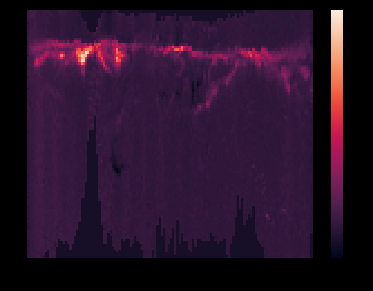

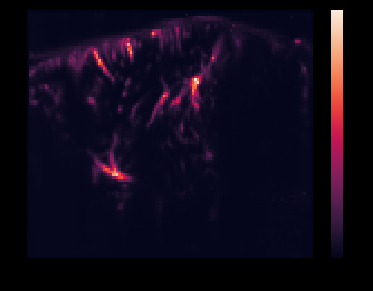

[[-0.21142837 -0.21566236 -0.21598879 ...  0.48751503  0.4847262
   0.48557022]
 [-0.21224406 -0.21462658 -0.22230059 ...  0.49041855  0.4873283
   0.48847568]
 [-0.21711032 -0.21610317 -0.21574074 ...  0.4967001   0.4968232
   0.49718463]
 ...
 [-0.18146154 -0.18218617 -0.17926177 ...  0.34396982  0.3381735
   0.35337797]
 [-0.18119211 -0.17861797 -0.17795897 ...  0.34081438  0.34112805
   0.3523115 ]
 [-0.18355308 -0.18232355 -0.17918442 ...  0.34174484  0.33865717
   0.3538901 ]]
(91, 128)
Pixels shifted by:  0.21998332 1.0093931


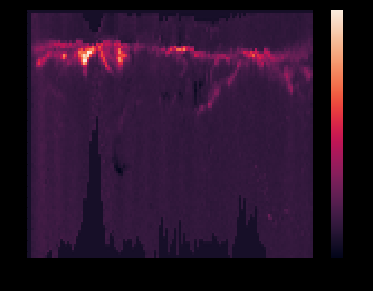

In [35]:
sizer= 0.5
offset_image= psr_avg_m68_BL[ :, :, 0].T
image= refMean68.T

plt.figure(figsize = (12.8*sizer, 9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= offset_image )
plt.show()
plt.figure(figsize = (12.8*sizer, 9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= image )
plt.show()


#-------------------------------------------------

flow = registration.optical_flow_tvl1(image, offset_image)

# display dense optical flow
vectorField_x = flow[1, :, :]
vectorField_y = flow[0, :, :]

print(vectorField_x)
print(vectorField_y.shape)

#Let us find the mean of all pixels in x and y and shift image by that amount
#ideally, you need to move each pixel by the amount from flow
xoff = np.mean(vectorField_x)
yoff = np.mean(vectorField_y)




print("Pixels shifted by: ", xoff, yoff)
corrected_image = shift(offset_image, shift=(xoff,yoff), mode='constant')

plt.figure(figsize = (12.8*sizer, 9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= corrected_image )
plt.show()



## __[+]__ Heuristics

### __[:]__ -- RigidBody

In [ ]:
# print(std_Unaligned)
print(unaligned180_300.shape)
print(psr_avg56_RB.shape)
print(refMean56.shape)
print("\n")

print(std_Unaligned.shape)
print(std_psr_avg56.shape)
# print(std_psr_avgTotal.shape)
# print(std_psr_movAvg60.shape)
# print(std_psr_movAvg120.shape)
# print(std_psr_prev.shape)
# print(std_psr_firstFrame.shape)
# print("\n")

print(np.sum(std_Unaligned))
print(np.sum(std_psr_avg56))
# print(np.sum(std_psr_avgTotal))
# print(np.sum(std_psr_movAvg60))
# print(np.sum(std_psr_movAvg120))
# print(np.sum(std_psr_prev))
# print(np.sum(std_psr_firstFrame))
# print("\n")

# print(psr_refAvg_DM[0:2])
# print(psr_avgTotal_DM[0:2])
# print(psr_movAvg60_DM[0:2])
# print(psr_movAvg120_DM[0:2])
# print(psr_prev_DM[0:2])
# print(psr_first_DM[0:2])

### __[:]__ -- Affine: 

In [ ]:
print(unaligned180_300.shape)
print(psr_avg56_RB.shape)
print(refMean56.shape)
print("\n")

print(std_Unaligned.shape)
print(std_psr_avg56_AF.shape)
# print(std_psr_avgTotal_AF.shape)
# print(std_psr_movAvg60_AF.shape)
# print(std_psr_movAvg120_AF.shape)
# print(std_psr_prev_AF.shape)
# print(std_psr_firstFrame_AF.shape)
# print("\n")

print(np.sum(std_Unaligned))
print(np.sum(std_psr_avg56_AF))
# print(np.sum(std_psr_avgTotal_AF))
# print(np.sum(std_psr_movAvg60_AF))
# print(np.sum(std_psr_movAvg120_AF))
# print(np.sum(std_psr_prev_AF))
# print(np.sum(std_psr_firstFrame_AF))
# print("\n")

# print(psr_refAvg_AF_DM[0:2])
# print(psr_avgTotal_AF_DM[0:2])
# print(psr_movAvg60_AF_DM[0:2])
# print(psr_movAvg120_AF_DM[0:2])
# print(psr_prev_AF_DM[0:2])
# print(psr_first_AF_DM[0:2])

### __[:]__ -- Scale Rotation: 

In [ ]:
print(unaligned180_300.shape)
print(psr_avg56.shape)
print(refMean56.shape)
print("\n")

print(std_Unaligned.shape)
print(std_psr_avg56_SR.shape)
print(std_psr_avgTotal_SR.shape)
print(std_psr_movAvg60_SR.shape)
print(std_psr_movAvg120_SR.shape)
print(std_psr_prev_SR.shape)
print(std_psr_firstFrame_SR.shape)
print("\n")

print(np.sum(std_Unaligned))
print(np.sum(std_psr_avg56_SR))
print(np.sum(std_psr_avgTotal_SR))
print(np.sum(std_psr_movAvg60_SR))
print(np.sum(std_psr_movAvg120_SR))
print(np.sum(std_psr_prev_SR))
print(np.sum(std_psr_firstFrame_SR))
print("\n")

print(psr_refAvg_SR_DM[0:2])
print(psr_avgTotal_SR_DM[0:2])
print(psr_movAvg60_SR_DM[0:2])
print(psr_movAvg120_SR_DM[0:2])
print(psr_prev_SR_DM[0:2])
print(psr_first_SR_DM[0:2])

### __[:]__ -- Bilinear: 

In [21]:
print(unaligned180_300.shape)
print(psr_avg56.shape)
print(refMean56.shape)
print("\n")

print(std_Unaligned.shape)
print(std_psr_avg56_BL.shape)
print(std_psr_avgTotal_BL.shape)
print(std_psr_movAvg60_BL.shape)
print(std_psr_movAvg120_BL.shape)
print(std_psr_prev_BL.shape)
print(std_psr_firstFrame_BL.shape)
print("\n")

print(np.sum(std_Unaligned))
print(np.sum(std_psr_avg56_BL))
print(np.sum(std_psr_avgTotal_BL))
print(np.sum(std_psr_movAvg60_BL))
print(np.sum(std_psr_movAvg120_BL))
print(np.sum(std_psr_prev_BL))
print(np.sum(std_psr_firstFrame_BL))
print("\n")

print(psr_refAvg_BL_DM[0:2])
print(psr_avgTotal_BL_DM[0:2])
print(psr_movAvg60_BL_DM[0:2])
print(psr_movAvg120_BL_DM[0:2])
print(psr_prev_BL_DM[0:2])
print(psr_first_BL_DM[0:2])

(128, 91, 9840)
(128, 91, 9840)
(128, 91)


(128, 91)
(128, 91)
(128, 91)
(128, 91)
(128, 91)
(128, 91)
(128, 91)


483.66505475326784
451.3620293158163
448.54879135492325
478.2221384957056
480.5721564427656
0.0
405.2637572864366


(array([7.34404732, 7.31481866, 7.32266997, ..., 6.41974486, 6.44158789,
       6.51204384]), array([0.07258914, 0.07393492, 0.07369198, ..., 0.09781782, 0.09796278,
       0.09768272]))
(array([7.41896832, 7.34462793, 7.35213779, ..., 6.40660213, 6.42754697,
       6.55614598]), array([0.07210414, 0.0734935 , 0.07361326, ..., 0.09769539, 0.09784154,
       0.09709116]))
(array([7.19474749, 7.20594648, 7.22058982, ..., 6.26408986, 6.28841556,
       6.31036768]), array([0.07704985, 0.07713696, 0.07727851, ..., 0.09979004, 0.09993591,
       0.10007979]))
(array([7.185715  , 7.19030764, 7.20681965, ..., 6.26727214, 6.29236349,
       6.31444238]), array([0.07702013, 0.07726504, 0.07736529, ..., 0.09996648, 0.10011058,
       0.10025326]))
(array([7.185715  , 

## __[ ]__ Data Viz

### __[+]__ RigidBody

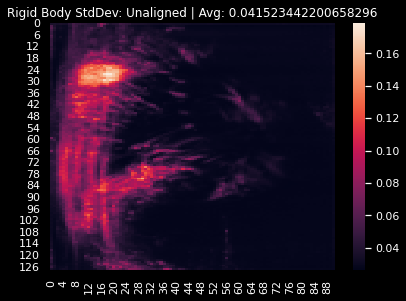

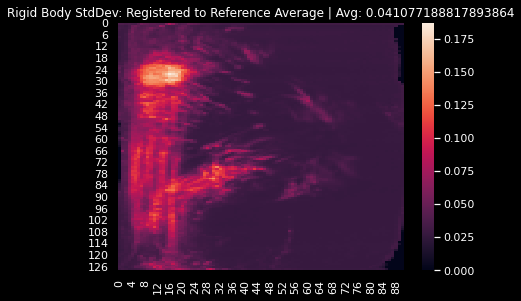

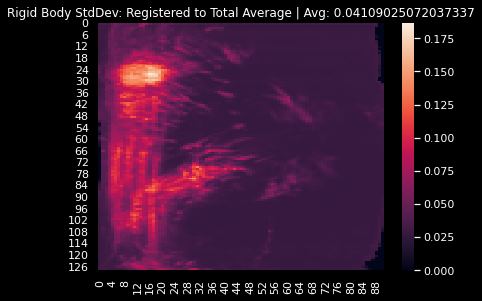

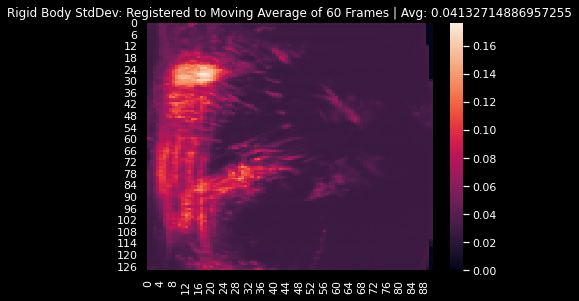

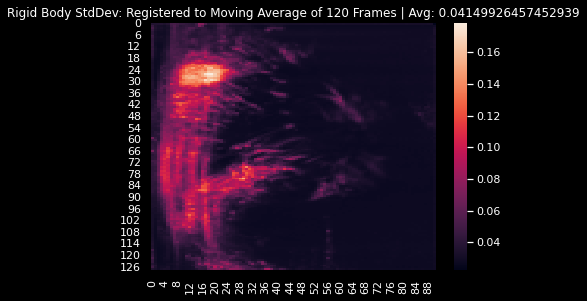

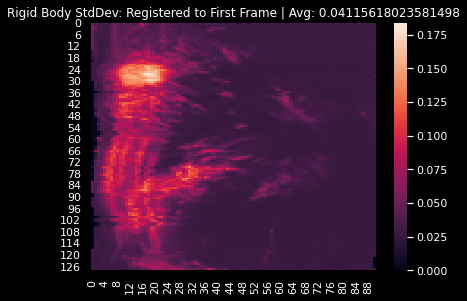

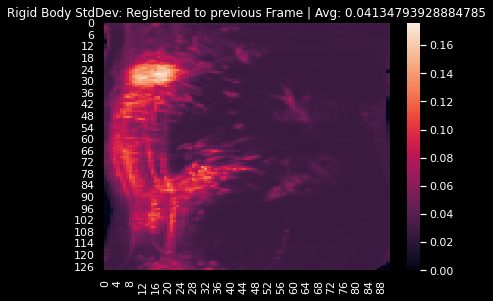

In [46]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .5

# plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
# plt.title('Distances: Unregistered-->refAvg')
# sb.lineplot(x=np.arange(vLen), y=unaligned_DM[0], color= 'cyan', label= 'Euclidian')
# sb.lineplot(x=np.arange(vLen), y=unaligned_DM[1]*100, color= 'magenta', label= 'Dicex10')
# plt.legend()
# plt.show()
plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_Unaligned )
plt.title('Rigid Body StdDev: Unaligned | Avg: ' + str(np.mean(std_Unaligned)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56 )
plt.title('Rigid Body StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avgTotal )
plt.title('Rigid Body StdDev: Registered to Total Average | Avg: ' + str(np.mean(std_psr_avgTotal)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg60 )
plt.title('Rigid Body StdDev: Registered to Moving Average of 60 Frames | Avg: ' + str(np.mean(std_psr_movAvg60)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg120 )
plt.title('Rigid Body StdDev: Registered to Moving Average of 120 Frames | Avg: ' + str(np.mean(std_psr_movAvg120)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_firstFrame )
plt.title('Rigid Body StdDev: Registered to First Frame | Avg: ' + str(np.mean(std_psr_firstFrame)))
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_prev)
plt.title('Rigid Body StdDev: Registered to previous Frame | Avg: ' + str(np.mean(std_psr_prev)))
plt.show()

### __[+]__ Affine

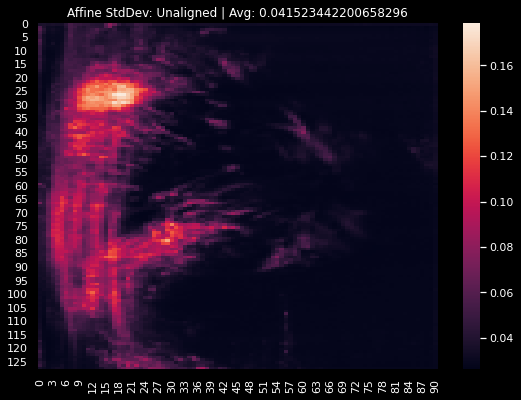

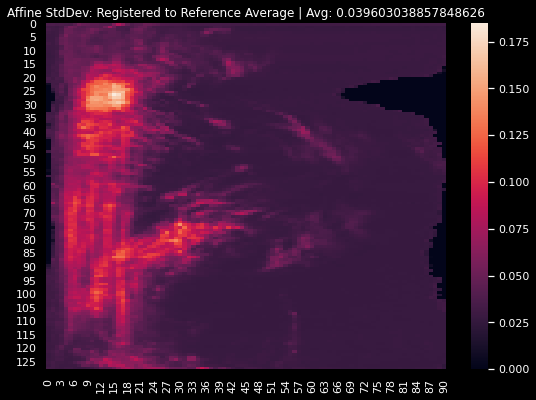

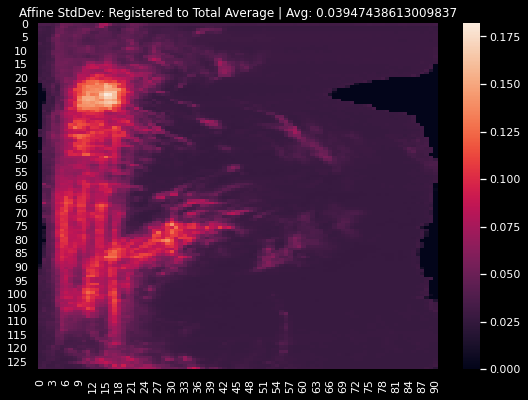

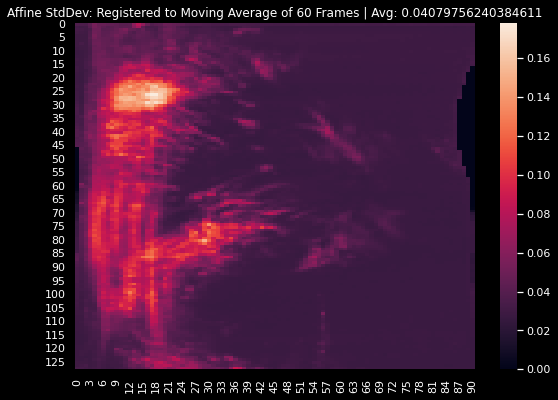

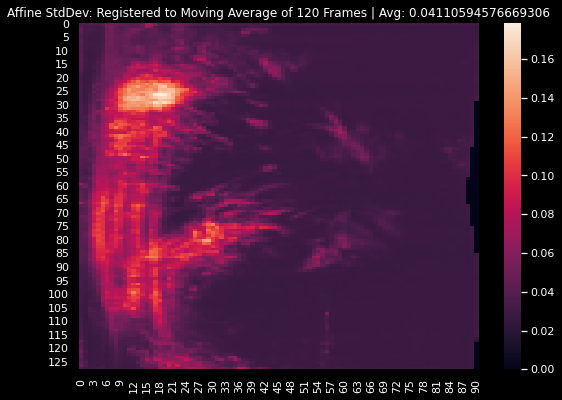

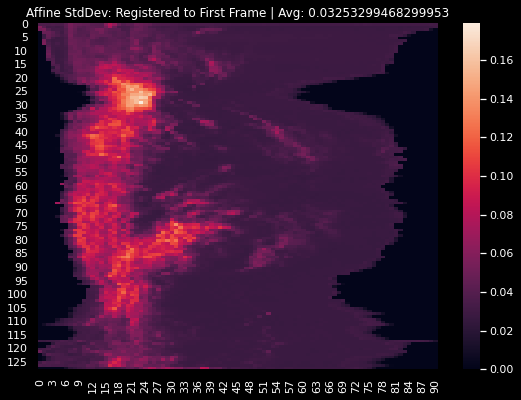

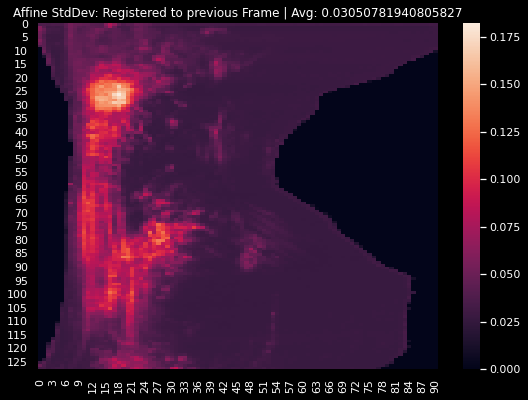

In [43]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

# plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
# plt.title('Distances: Unregistered-->refAvg')
# sb.lineplot(x=np.arange(vLen), y=unaligned_DM[0], color= 'cyan', label= 'Euclidian')
# sb.lineplot(x=np.arange(vLen), y=unaligned_DM[1]*100, color= 'magenta', label= 'Dicex10')
# plt.legend()
# plt.show()
plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_Unaligned )
plt.title('Affine StdDev: Unaligned | Avg: ' + str(np.mean(std_Unaligned)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_AF )
plt.title('Affine StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_AF)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avgTotal_AF )
plt.title('Affine StdDev: Registered to Total Average | Avg: ' + str(np.mean(std_psr_avgTotal_AF)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg60_AF )
plt.title('Affine StdDev: Registered to Moving Average of 60 Frames | Avg: ' + str(np.mean(std_psr_movAvg60_AF)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg120_AF )
plt.title('Affine StdDev: Registered to Moving Average of 120 Frames | Avg: ' + str(np.mean(std_psr_movAvg120_AF)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_firstFrame_AF )
plt.title('Affine StdDev: Registered to First Frame | Avg: ' + str(np.mean(std_psr_firstFrame_AF)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_prev_AF)
plt.title('Affine StdDev: Registered to previous Frame | Avg: ' + str(np.mean(std_psr_prev_AF)))
plt.show()

### __[+]__ Scale + Rotation

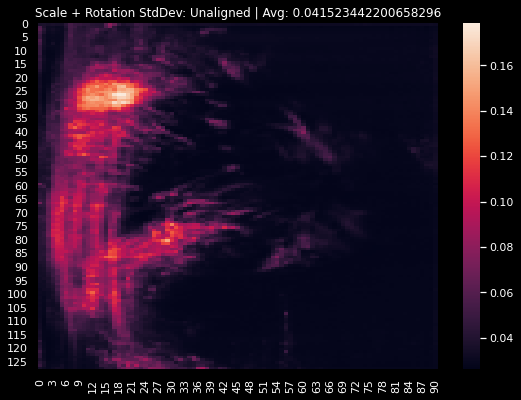

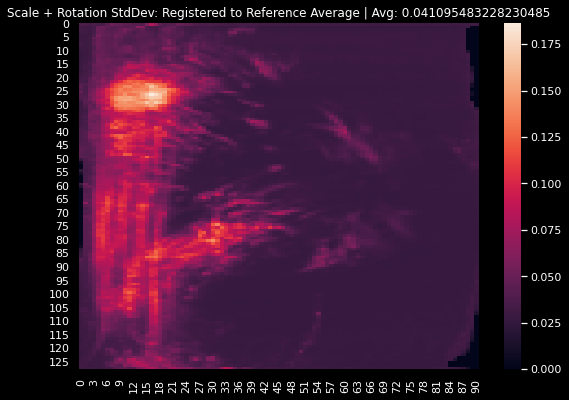

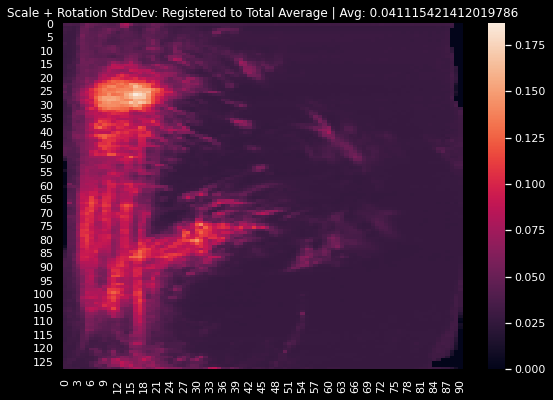

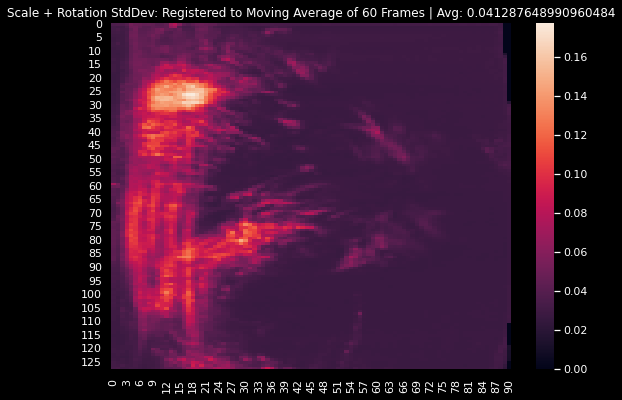

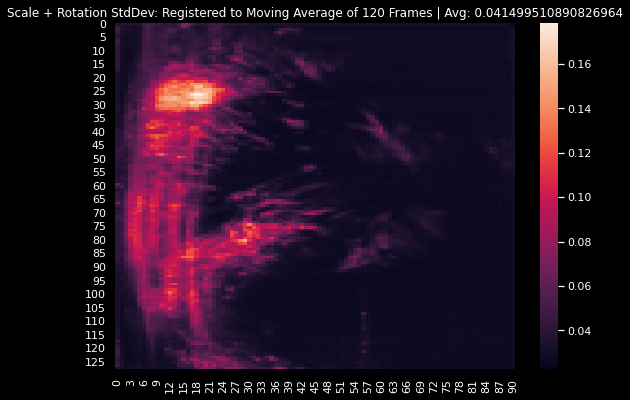

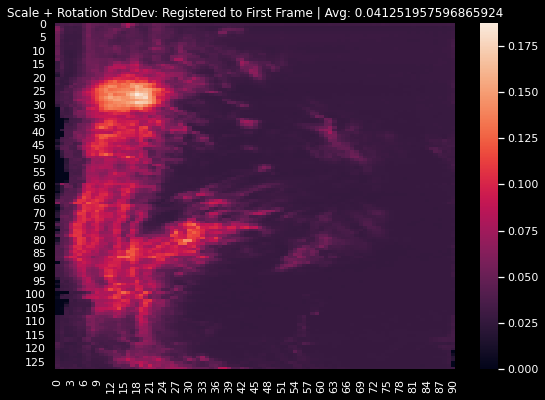

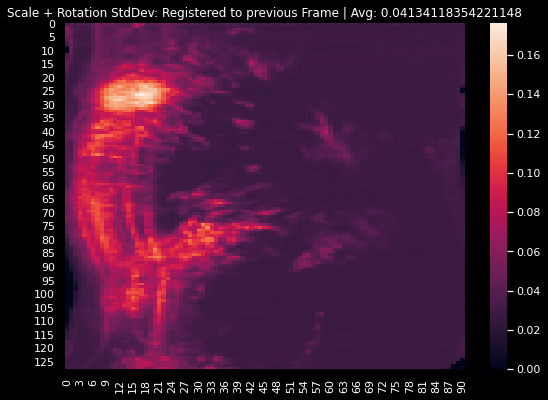

In [44]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_Unaligned )
plt.title('Scale + Rotation StdDev: Unaligned | Avg: ' + str(np.mean(std_Unaligned)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_SR )
plt.title('Scale + Rotation StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_SR)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avgTotal_SR )
plt.title('Scale + Rotation StdDev: Registered to Total Average | Avg: ' + str(np.mean(std_psr_avgTotal_SR)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg60_SR )
plt.title('Scale + Rotation StdDev: Registered to Moving Average of 60 Frames | Avg: ' + str(np.mean(std_psr_movAvg60_SR)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg120_SR )
plt.title('Scale + Rotation StdDev: Registered to Moving Average of 120 Frames | Avg: ' + str(np.mean(std_psr_movAvg120_SR)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_firstFrame_SR )
plt.title('Scale + Rotation StdDev: Registered to First Frame | Avg: ' + str(np.mean(std_psr_firstFrame_SR)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_prev_SR)
plt.title('Scale + Rotation StdDev: Registered to previous Frame | Avg: ' + str(np.mean(std_psr_prev_SR)))
plt.show()

### __[+]__ Bilinear

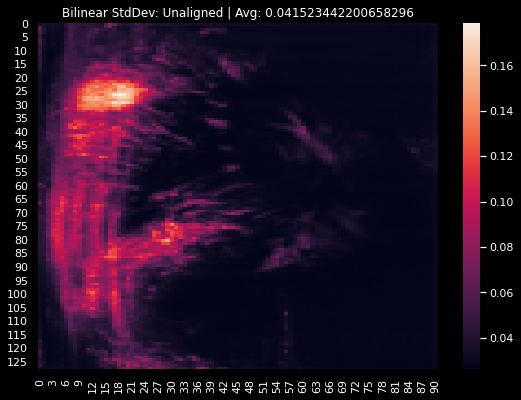

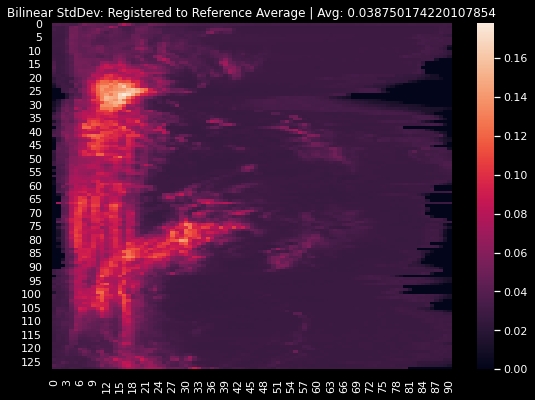

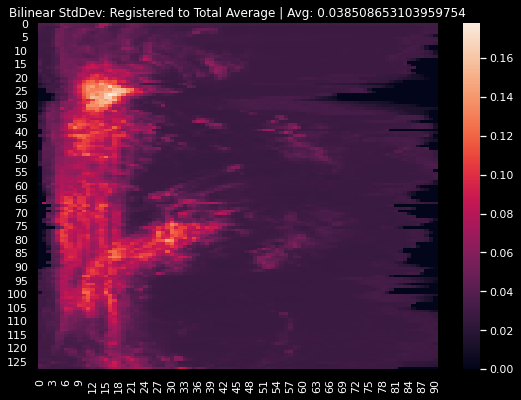

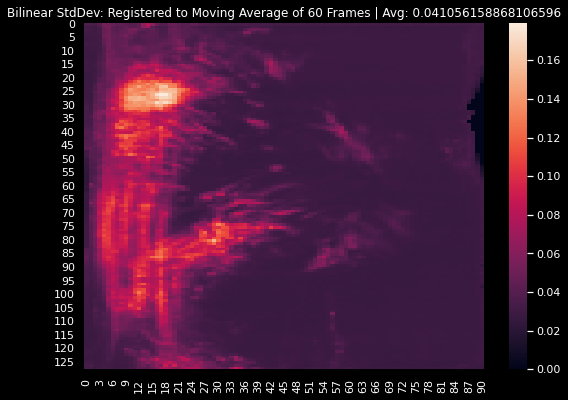

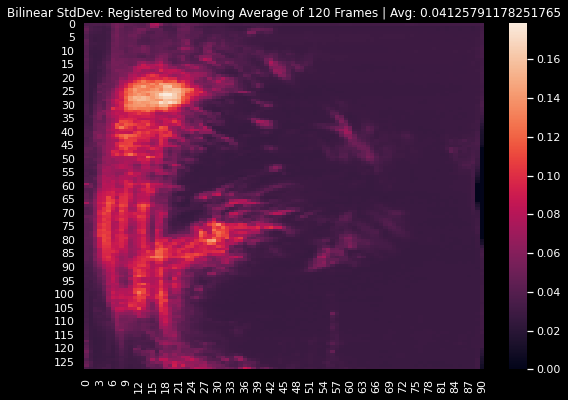

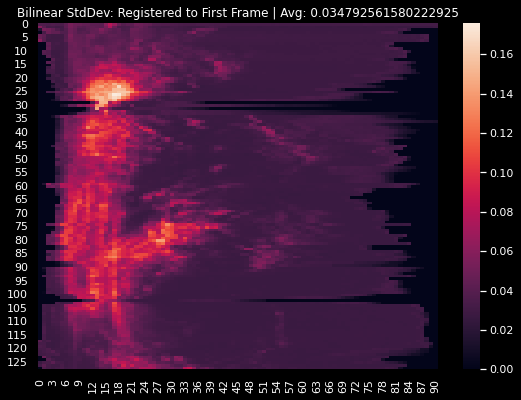

In [45]:
sb.set_theme(style="dark", palette=None, font= 'roboto mono')
plt.style.use("dark_background")
sizer= .7

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_Unaligned )
plt.title('Bilinear StdDev: Unaligned | Avg: ' + str(np.mean(std_Unaligned)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56_BL )
plt.title('Bilinear StdDev: Registered to Reference Average | Avg: ' + str(np.mean(std_psr_avg56_BL)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avgTotal_BL )
plt.title('Bilinear StdDev: Registered to Total Average | Avg: ' + str(np.mean(std_psr_avgTotal_BL)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg60_BL )
plt.title('Bilinear StdDev: Registered to Moving Average of 60 Frames | Avg: ' + str(np.mean(std_psr_movAvg60_BL)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_movAvg120_BL )
plt.title('Bilinear StdDev: Registered to Moving Average of 120 Frames | Avg: ' + str(np.mean(std_psr_movAvg120_BL)))
plt.show()

plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_firstFrame_BL )
plt.title('Bilinear StdDev: Registered to First Frame | Avg: ' + str(np.mean(std_psr_firstFrame_BL)))
plt.show()

In [8]:
sizer= 1
unreg= unaligned_DM[0]
 
eucliDiction= {'barCluster': np.concatenate((['Rigid Body']*6, ['Affine']*6, ['Scale+Rotate']*6, ['Bilinear']*6)),
        'clrCategory': ['Avg Mouse56', 'Avg Total', 'MovAvg size 60', 'MovAvg Size 120', 'Previous Frame', 'First Frame']*4,
        'EucliDistance': [
            np.mean(psr_refAvg_DM[0]), 
            np.mean(psr_avgTotal_DM[0]),
            np.mean(psr_movAvg60_DM[0]),
            np.mean(psr_movAvg120_DM[0]), 
            np.mean(psr_prev_DM[0]), 
            np.mean(psr_first_DM[0]),

            np.mean(psr_refAvg_AF_DM[0]), 
            np.mean(psr_avgTotal_AF_DM[0]),
            np.mean(psr_movAvg60_AF_DM[0]),
            np.mean(psr_movAvg120_AF_DM[0]), 
            np.mean(psr_prev_AF_DM[0]), 
            np.mean(psr_first_AF_DM[0]),

            np.mean(psr_refAvg_SR_DM[0]), 
            np.mean(psr_avgTotal_SR_DM[0]),
            np.mean(psr_movAvg60_SR_DM[0]),
            np.mean(psr_movAvg120_SR_DM[0]), 
            np.mean(psr_prev_SR_DM[0]), 
            np.mean(psr_first_SR_DM[0]),

            np.mean(psr_refAvg_BL_DM[0]), 
            np.mean(psr_avgTotal_BL_DM[0]),
            np.mean(psr_movAvg60_BL_DM[0]),
            np.mean(psr_movAvg120_BL_DM[0]), 
            np.mean(psr_prev_BL_DM[0]), 
            np.mean(psr_first_BL_DM[0])
        ],
        'DiceSim': [
            np.mean(psr_refAvg_DM[1]), 
            np.mean(psr_avgTotal_DM[1]),
            np.mean(psr_movAvg60_DM[1]),
            np.mean(psr_movAvg120_DM[1]), 
            np.mean(psr_prev_DM[1]), 
            np.mean(psr_first_DM[1]),

            np.mean(psr_refAvg_AF_DM[1]), 
            np.mean(psr_avgTotal_AF_DM[1]),
            np.mean(psr_movAvg60_AF_DM[1]),
            np.mean(psr_movAvg120_AF_DM[1]), 
            np.mean(psr_prev_AF_DM[1]), 
            np.mean(psr_first_AF_DM[1]),

            np.mean(psr_refAvg_SR_DM[1]), 
            np.mean(psr_avgTotal_SR_DM[1]),
            np.mean(psr_movAvg60_SR_DM[1]),
            np.mean(psr_movAvg120_SR_DM[1]), 
            np.mean(psr_prev_SR_DM[1]), 
            np.mean(psr_first_SR_DM[1]),

            np.mean(psr_refAvg_BL_DM[1]), 
            np.mean(psr_avgTotal_BL_DM[1]),
            np.mean(psr_movAvg60_BL_DM[1]),
            np.mean(psr_movAvg120_BL_DM[1]), 
            np.mean(psr_prev_BL_DM[1]), 
            np.mean(psr_first_BL_DM[1])
        ],
        # 'Tmp': np.arange(18)
}
eucliDataFrame = pd.DataFrame(eucliDiction)


stdDiction= {'barCluster': np.concatenate((['Rigid Body']*6, ['Affine']*6, ['Scale+Rotate']*6, ['Bilinear']*6)),
        'clrCategory': ['Avg Mouse56', 'Avg Total', 'MovAvg size 60', 'MovAvg Size 120', 'Previous Frame', 'First Frame']*4,
        'std': [
            np.mean(std_psr_avg56), 
            np.mean(std_psr_avgTotal),
            np.mean(std_psr_movAvg60),
            np.mean(std_psr_movAvg120), 
            np.mean(std_psr_prev), 
            np.mean(std_psr_firstFrame),

            np.mean(std_psr_avg56_AF), 
            np.mean(std_psr_avgTotal_AF),
            np.mean(std_psr_movAvg60_AF),
            np.mean(std_psr_movAvg120_AF), 
            np.mean(std_psr_prev_AF), 
            np.mean(std_psr_firstFrame_AF),

            np.mean(std_psr_avg56_SR), 
            np.mean(std_psr_avgTotal_SR),
            np.mean(std_psr_movAvg60_SR),
            np.mean(std_psr_movAvg120_SR), 
            np.mean(std_psr_prev_SR), 
            np.mean(std_psr_firstFrame_SR),

            np.mean(std_psr_avg56_BL), 
            np.mean(std_psr_avgTotal_BL),
            np.mean(std_psr_movAvg60_BL),
            np.mean(std_psr_movAvg120_BL), 
            np.mean(std_psr_prev_BL), 
            np.mean(std_psr_firstFrame_BL)
        ],
}
stdDF = pd.DataFrame(stdDiction)



plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
barPlot= sb.barplot(x='barCluster', y='EucliDistance', 
           hue='clrCategory', 
           data= eucliDataFrame, 
        #    palette= 'colorblind', 
         #   palette= 'pastel'
           palette= 'Spectral'
           #order = ['Rigid Body','Affine','Scale+Rotation']
)
plt.ylim(0, 10) # adjust y-axis limits
barPlot.set(xlabel='Registration Type',ylabel='Distance', title='Euclidian Distance Avg.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= 'Referencing Method')
plt.show()


plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
barPlot= sb.barplot(x='barCluster', y='DiceSim', 
           hue='clrCategory', 
           data= eucliDataFrame, 
           palette= 'Spectral'
)
plt.ylim(0, .1) 
barPlot.set(xlabel='Registration Type',ylabel='Distance', title='Dice Similarity Avg.')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= 'Referencing Method')
plt.show()



plt.figure(figsize = (12.8*sizer,9.1*sizer), facecolor= "black", edgecolor="black")
barPlot= sb.barplot(x='barCluster', y='std', 
           hue='clrCategory', 
           data= stdDF, 
           palette= 'Spectral'
)
plt.ylim(0, 0.05) 
barPlot.set(xlabel='Registration Type',ylabel='Avg stdDev', title='Standard Deviation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= 'Referencing Method')
plt.show()




NameError: name 'unaligned_DM' is not defined

### __[::]__ DFT Registration

In [ ]:
sizer= 0.5
figsize= (14*sizer, 9.1*sizer)
# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= (std_Unaligned) )
# plt.title('StdDev: Unregistered | Avg: ' + str(np.mean(std_Unaligned)))
# plt.show()

# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= (std_dft_reg) )
# plt.title('StdDev: DFT Registration | Avg: ' + str(np.mean(std_dft_reg)))
# plt.show()


# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= std_psr_avg56 )
# plt.title('StdDev: PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
# plt.show()


# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= std_psr_avg56_AF )
# plt.title('StdDev: PSR_AF Registration | Avg: ' + str(np.mean(std_psr_avg56_AF)))
# plt.show()

# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= std_psr_avg56_SR )
# plt.title('StdDev: PSR_SR Registration | Avg: ' + str(np.mean(std_psr_avg56_SR)))
# plt.show()

# plt.figure(figsize = (12.8*0.7,9.1*0.7), facecolor= "black", edgecolor="black")
# sb.heatmap(data= std_psr_avg56_BL )
# plt.title('StdDev: PSR_BL Registration | Avg: ' + str(np.mean(std_psr_avg56_BL)))
# plt.show()





# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= (dft_reg[ :, :, 5+1]).T )
# plt.title('DFT Registration | Avg: ' + str(np.mean(std_dft_reg)))
# plt.show()

# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= (imreg.register_images(refMean56, (dft_reg[ :, :, 5+1]), return_registered=True )[2] ).T)
# plt.title('DFT New | Avg: ' + str(np.mean(std_Unaligned)))
# plt.show()

# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= (unaligned180_300_noPrefix[ :, :, 5]).T )
# plt.title('Unregistered | Avg: ' + str(np.mean(std_Unaligned)))
# plt.show()

# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= psr_avg56[ :, :, 5].T )
# plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
# plt.show()

refStd = np.std(io.imread(refMouse56_File), axis=2)

plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
sb.heatmap(data= np.std(unaligned180_300_noPrefix, axis= 2).T )
plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
plt.show()
# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= np.mean(unaligned180_300_noPrefix, axis= 2).T )
# plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
# plt.show()


# plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
# sb.heatmap(data= np.mean(psr_avg56, axis= 2).T )
# plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
# plt.show()
plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
sb.heatmap(data= np.std(psr_avg56, axis= 2).T )
plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
plt.show()
plt.figure(figsize = figsize, facecolor= "black", edgecolor="black")
sb.heatmap(data= std_psr_avg56.T )
plt.title('PSR Rigid Body Registration | Avg: ' + str(np.mean(std_psr_avg56)))
plt.show()

print(psr_avg56.shape)


## __[:::]__ ToDo

##### __[:+:]__--- Pre-processing ---
 - [+] Fix tiff files, they seem to be only 91x3600 instead of 91x128x3600
 - [+] Convert one ref MAT into TIFF
 - [+] Convert all 82 MATs into TIFFs
 - [+] Split single tiff file (sample) into first 100-300 frames
 - [+] Split whole data set into first 100-300 frames
 - [+] Change reference and substack to 180-300 frames
 - [+] save unaligned tiff 
##### __[::]__-- Alignment Algos (120-300) ---
 - [+] Pystackreg Align with reference avg
 - [+] Pystackreg ALign with moving window size 60
 - [+] Pystackreg ALign with total Average
 - [+] PSR previous frame
 - [+] PSR first frame
 - [+] Moving windows of multiple sizes
 - [+] Affine type registration
 - [+] Scaled Rotation type registration
 - [+] Bilinear type registration
 - [-] Combined Algos
 - [+] ch^2 shift registration
 - [ ] cross-correlation shift
 - [ ] Sub-pixel image registration
    - [ ] ^how to get corrected images

##### __[::]__-- Heuristics Functions ---
 - [x] Euclidian distance 
 - [x] Standard deviation
 - [x] Dice distance
 - [ ] Min & Max
 - [ ] Chi^2
 
 ##### __[::]__-- Data Viz ---
 - [+] Rigid Body Registration
 - [+] Animate pystackreg registered
 - [+] Affine type registration
 - [+] Scaled Rotation type registration
 - [+] Bilinear type registration
 - [ ] DFT 
 - [ ] Reorganize: Add reference mouse, and omit other referencing methods
 - [ ] Error Bars



##### -[::]--- Misc ---
 - [+] Make Repo
 - [+] Form Functions
 - [+] Fix tensorInfo fx
 - [+] Bar Graphs
 - [ ] Better Animations
 - [+] Compare single images across different mice, and find the differences
 - [+] Create DataFrame for plotting
 - [ ] References: #56, 68, 97
 - [ ] cPCA  analysis
 - [ ] Study Referencing Methods
 - [ ] Slides